<a href="https://colab.research.google.com/github/JonaBaron/TensorFlow/blob/main/01_neural_network_regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with neural networks in TensorFlow

In [35]:
import tensorflow as tf
print(tf.__version__)

2.17.1


# Create data to view and fit

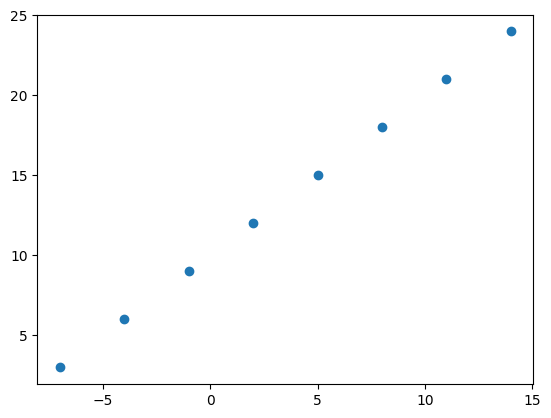

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Create feature

x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x, y)

In [37]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [38]:
# Create a demo tensor for the housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [39]:
input_shape = house_info.shape
output_shape = house_price.shape
input_shape, output_shape

(TensorShape([3]), TensorShape([1]))

In [40]:
# Turn the Numpy array to tensors
x = tf.cast(tf.constant(x), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [41]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

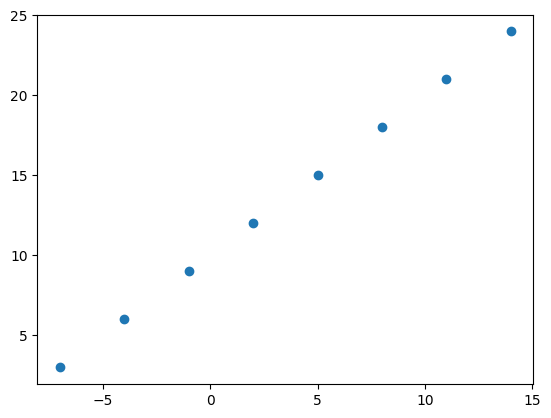

In [42]:
plt.scatter(x, y)

## Step in modelling with tensorflow

1.Create a model
2.Compile the model
3.Fit the model
4.Evaluate the model
5.Improve through experimentation
6.Predict with model

In [43]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential api
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is for stochastis gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(x,axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step - loss: 11.0774 - mae: 11.0774
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - loss: 10.9449 - mae: 10.9449
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.8124 - mae: 10.8124
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 10.6799 - mae: 10.6799
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.5474 - mae: 10.5474


In [44]:
# Look x and y
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [45]:
# Try and make a prediction using our model
y_pred = model.predict(np.array([17.0]) )
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[14.791929]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. Creating a model - here we might add more layers, increase the number of hidden
units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. Compiling a model - here we might change the optimization function or perhaps the learning rate of the optimization function.

3. Fitting a model - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [46]:
# lets rebuild our model (will train more)

# 1- create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2- Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3- Fit
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step - loss: 8.9464 - mae: 8.9464
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.8139 - mae: 8.8139
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.6814 - mae: 8.6814
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.5489 - mae: 8.5489
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.4164 - mae: 8.4164
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 8.2839 - mae: 8.2839
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.1514 - mae: 8.1514
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 8.0189 - mae: 8.0189
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.8864 - mae: 7.8864
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.7539 - mae: 7.7539
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.6214 - mae: 7.6214
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.4889 - mae: 7.4889
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/st

In [47]:
# Is our prediction improved ?

model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[30.037441]], dtype=float32)

In [34]:
# lets rebuild our model (will have another hidden layer with 100 hiddent unit)

# 1- create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2- Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3- Fit
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step - loss: 13.6484 - mae: 13.6484
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 13.0500 - mae: 13.0500
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 12.4602 - mae: 12.4602
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 11.8906 - mae: 11.8906
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 11.3083 - mae: 11.3083
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.7037 - mae: 10.7037
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.0822 - mae: 10.0822
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.4403 - mae: 9.4403
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.7710 - mae: 8.7710
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.0577 - mae: 8.0577
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.2948 - mae: 7.2948
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.4763 - mae: 6.4763
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [51]:
# Is our prediction improved ?

model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[30.037441]], dtype=float32)